# PROGETTO FINALE IDS

## Predizione dei risultati della Serie A 2023/2024

## Obiettivo

Utilizzeremo un dataset della stagione di calcio della Serie A 2023/2024 per predire i risultati delle ultime 5 giornate del campionato (dalla 33ª alla 38ª giornata).

In un campionato con 20 squadre e 38 giornate totali, ogni squadra gioca 38 partite. Le 5 giornate finali costituiscono 50 partite complessive (10 partite per giornata × 5 giornate).

Per ciascuna partita, proveremo a prevedere il risultato usando uno dei seguenti segni:

* **1**: Vittoria della squadra di casa
* **X**: Pareggio
* **2**: Vittoria della squadra in trasferta

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn

## Importazione e prima esplorazione dei dati

Importiamo il file 'Serie A_matches_23_24.csv' che contiene tutti i risultati delle partite del campionato e visualizziamo le prime righe.

In [2]:
matches = pd.read_csv('dataset/Serie A_matches_23_24.csv')
matches.head()


,Round,Round Name,Home Team,Away Team,UTC Time,Finished,Started,Cancelled,Awarded,Score,Match Status,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,1,Empoli,Hellas Verona,2023-08-19T16:30:00Z,True,True,False,False,0_1,Full-Time,NaN,NaN,NaN,NaN
1,1,1,Frosinone,Napoli,2023-08-19T16:30:00Z,True,True,False,False,1_3,Full-Time,NaN,NaN,NaN,NaN
2,1,1,Genoa,Fiorentina,2023-08-19T18:45:00Z,True,True,False,False,1_4,Full-Time,NaN,NaN,NaN,NaN
3,1,1,Inter,Monza,2023-08-19T18:45:00Z,True,True,False,False,2_0,Full-Time,NaN,NaN,NaN,NaN
4,1,1,Roma,Salernitana,2023-08-20T16:30:00Z,True,True,False,False,2_2,Full-Time,NaN,NaN,NaN,NaN


## Pulizia dei dati

Dalla tabella notiamo che 'Round' e 'Round Name' sono ridondanti. Inoltre ci sono diverse colonne vuote che possiamo eliminare.

In [3]:
drop_columns = ['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14','Round Name']
matches.drop(drop_columns, axis=1, inplace=True)
matches.head()

,Round,Home Team,Away Team,UTC Time,Finished,Started,Cancelled,Awarded,Score,Match Status
0,1,Empoli,Hellas Verona,2023-08-19T16:30:00Z,True,True,False,False,0_1,Full-Time
1,1,Frosinone,Napoli,2023-08-19T16:30:00Z,True,True,False,False,1_3,Full-Time
2,1,Genoa,Fiorentina,2023-08-19T18:45:00Z,True,True,False,False,1_4,Full-Time
3,1,Inter,Monza,2023-08-19T18:45:00Z,True,True,False,False,2_0,Full-Time
4,1,Roma,Salernitana,2023-08-20T16:30:00Z,True,True,False,False,2_2,Full-Time


In [4]:
#controlliamo se ci sono valori nulli
matches.isnull().sum()

Round           0
Home Team       0
Away Team       0
UTC Time        0
Finished        0
Started         0
Cancelled       0
Awarded         0
Score           0
Match Status    0
dtype: int64

## Elaborazione dei risultati

La colonna 'Score' contiene il risultato completo della partita in un unico campo. Per facilitare l'analisi, dividiamo questo valore in due colonne separate: 'Score_casa' e 'Score_trasferta'.

In [5]:
matches[['Score_casa', 'Score_trasferta']] = matches['Score'].str.split('_', expand=True).astype(int)
matches.drop('Score', axis=1, inplace=True)
matches.head()

,Round,Home Team,Away Team,UTC Time,Finished,Started,Cancelled,Awarded,Match Status,Score_casa,Score_trasferta
0,1,Empoli,Hellas Verona,2023-08-19T16:30:00Z,True,True,False,False,Full-Time,0,1
1,1,Frosinone,Napoli,2023-08-19T16:30:00Z,True,True,False,False,Full-Time,1,3
2,1,Genoa,Fiorentina,2023-08-19T18:45:00Z,True,True,False,False,Full-Time,1,4
3,1,Inter,Monza,2023-08-19T18:45:00Z,True,True,False,False,Full-Time,2,0
4,1,Roma,Salernitana,2023-08-20T16:30:00Z,True,True,False,False,Full-Time,2,2


## Creazione della colonna Risultato (1, X, 2)

Creiamo una nuova colonna 'Risultato' che segue la notazione delle scommesse sportive:

* **1**: Se la squadra di casa ha segnato più gol
* **X**: Se il risultato è un pareggio
* **2**: Se la squadra in trasferta ha segnato più gol

In [6]:
matches.loc[matches['Score_casa'] > matches['Score_trasferta'], 'Risultato'] = '1'
matches.loc[matches['Score_casa'] < matches['Score_trasferta'], 'Risultato'] = '2'
matches.loc[matches['Score_casa'] == matches['Score_trasferta'], 'Risultato'] = 'X'
matches.head()

,Round,Home Team,Away Team,UTC Time,Finished,Started,Cancelled,Awarded,Match Status,Score_casa,Score_trasferta,Risultato
0,1,Empoli,Hellas Verona,2023-08-19T16:30:00Z,True,True,False,False,Full-Time,0,1,2
1,1,Frosinone,Napoli,2023-08-19T16:30:00Z,True,True,False,False,Full-Time,1,3,2
2,1,Genoa,Fiorentina,2023-08-19T18:45:00Z,True,True,False,False,Full-Time,1,4,2
3,1,Inter,Monza,2023-08-19T18:45:00Z,True,True,False,False,Full-Time,2,0,1
4,1,Roma,Salernitana,2023-08-20T16:30:00Z,True,True,False,False,Full-Time,2,2,X


# Analisi esplorativa dei dati

Analizziamo i dati per identificare pattern che potrebbero aiutarci nella nostra predizione.

## Rendimento delle squadre in casa e in trasferta

Uno dei fattori più importanti per predire i risultati calcistici è il vantaggio del fattore campo. Analizziamo come si sono comportate le squadre nelle partite casalinghe rispetto a quelle in trasferta.

In [7]:
# Raggruppiamo i dati per squadra di casa e calcoliamo statistiche
home_stats = matches.groupby('Home Team').agg({
    'Risultato': ['count', lambda x: (x == '1').sum(), lambda x: (x == 'X').sum(), lambda x: (x == '2').sum()],
    'Score_casa': 'sum',
    'Score_trasferta': 'sum'
})

home_stats.columns = ['Partite_casa', 'Vittorie_casa', 'Pareggi_casa', 'Sconfitte_casa', 'GolFatti_casa', 'GolSubiti_casa']
home_stats['Punti_casa'] = home_stats['Vittorie_casa'] * 3 + home_stats['Pareggi_casa']

# Raggruppiamo i dati per squadra in trasferta e calcoliamo statistiche
away_stats = matches.groupby('Away Team').agg({
    'Risultato': ['count', lambda x: (x == '2').sum(), lambda x: (x == 'X').sum(), lambda x: (x == '1').sum()],
    'Score_trasferta': 'sum',
    'Score_casa': 'sum'
})

away_stats.columns = ['Partite_trasferta', 'Vittorie_trasferta', 'Pareggi_trasferta', 'Sconfitte_trasferta', 'GolFatti_trasferta', 'GolSubiti_trasferta']
away_stats['Punti_trasferta'] = away_stats['Vittorie_trasferta'] * 3 + away_stats['Pareggi_trasferta']

# Unisci i dataframe
team_stats = pd.merge(home_stats, away_stats, left_index=True, right_index=True)

# Calcola la differenza tra punti in casa e in trasferta
team_stats['Diff_punti'] = team_stats['Punti_casa'] - team_stats['Punti_trasferta']

# Ordina in base alla differenza
team_stats_sorted = team_stats.sort_values('Diff_punti', ascending=False)

team_stats_sorted[['Punti_casa', 'Punti_trasferta', 'Diff_punti']].head(10)

,Punti_casa,Punti_trasferta,Diff_punti
Home Team,,,
Roma,40,23,17
Frosinone,25,10,15
Bologna,41,27,14
Cagliari,25,11,14
Torino,33,20,13
Atalanta,41,28,13
Genoa,30,19,11
Lecce,24,14,10
Fiorentina,35,25,10


### Visualizzazione grafica del rendimento casa vs trasferta

Il grafico seguente mostra per ogni squadra i punti ottenuti in casa (in blu) e in trasferta (in arancione), ordinate in base alla maggior differenza tra rendimento casalingo e in trasferta.

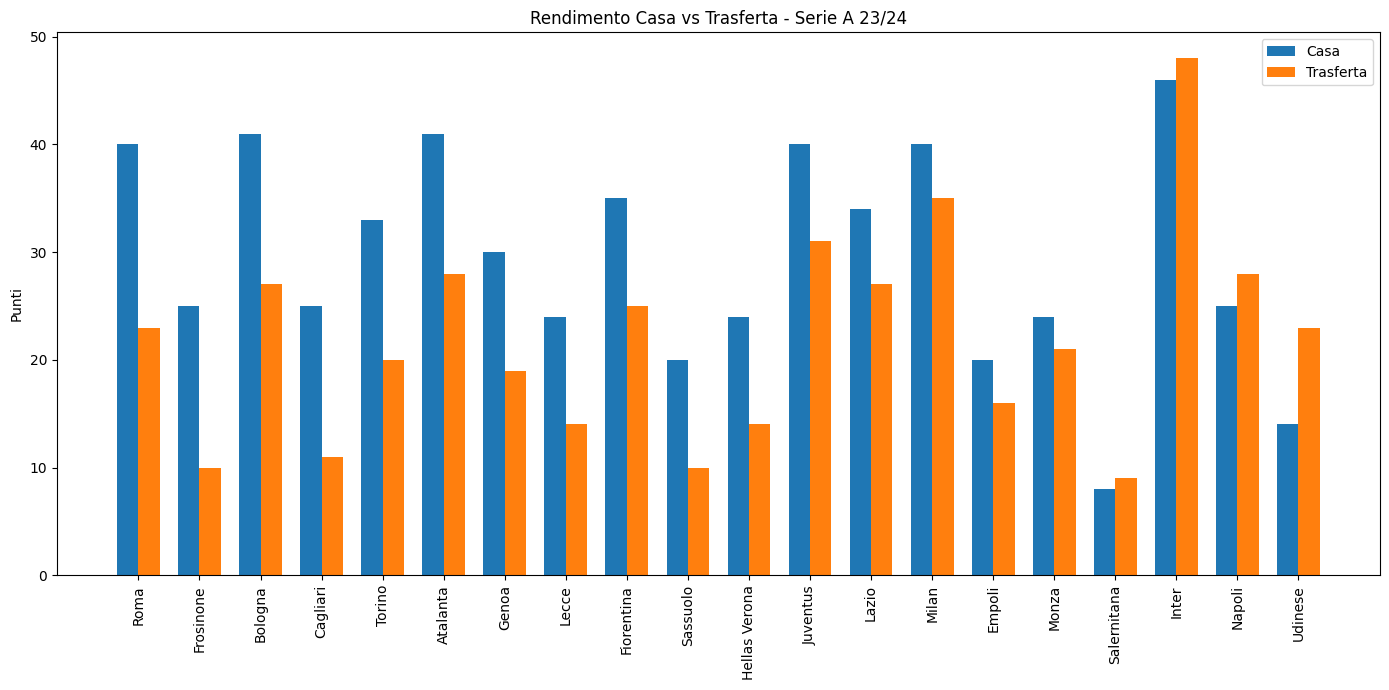

In [8]:
plt.figure(figsize=(14, 7))

# Numero squadre
N = len(team_stats_sorted)
ind = np.arange(N)  # posizione X
width = 0.35  # larghezza barre

plt.bar(ind, team_stats_sorted['Punti_casa'], width, label='Casa')
plt.bar(ind + width, team_stats_sorted['Punti_trasferta'], width, label='Trasferta')

plt.ylabel('Punti')
plt.title('Rendimento Casa vs Trasferta - Serie A 23/24')
plt.xticks(ind + width / 2, team_stats_sorted.index, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

## Analisi offensiva e difensiva delle squadre

Esaminiamo il rendimento offensivo e difensivo delle squadre. Questo ci può aiutare a capire quali squadre segnano di più e quali subiscono meno gol, fattori determinanti per predire i risultati.

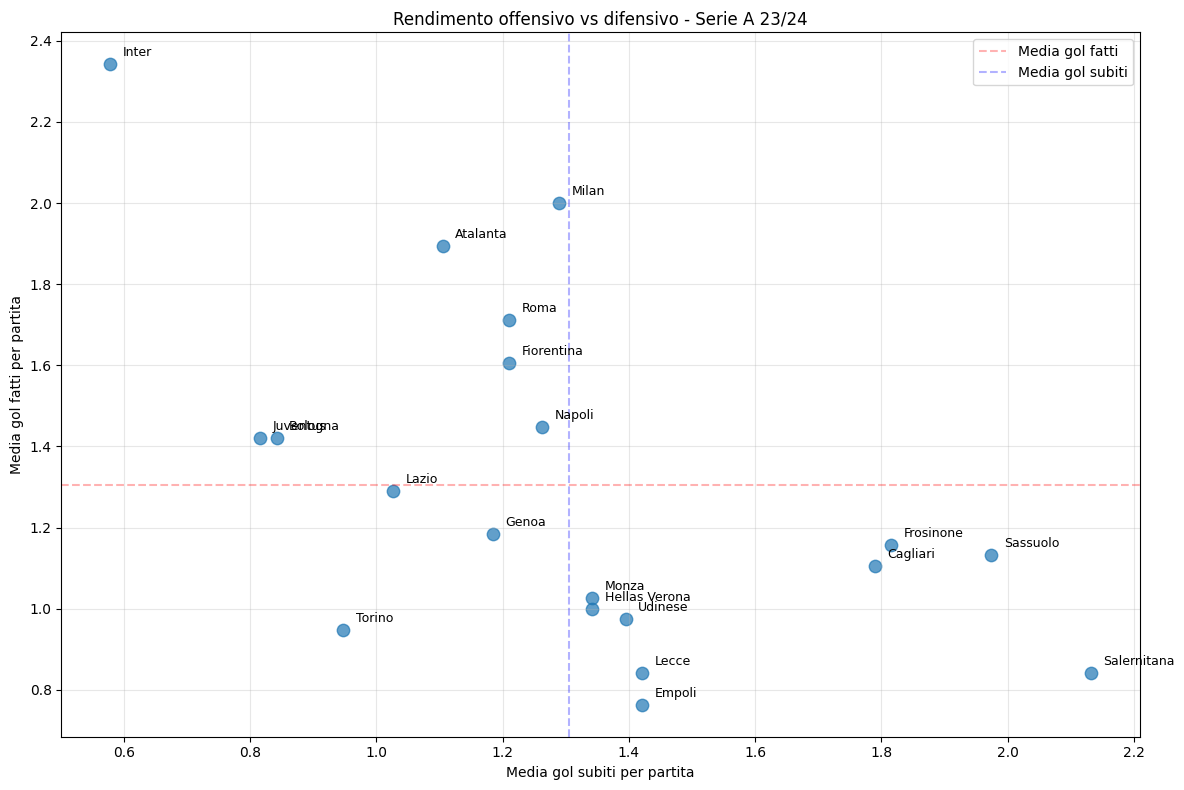

In [9]:
# Calcoliamo la media di gol segnati e subiti per ciascuna squadra
team_stats['Media_gol_fatti'] = (team_stats['GolFatti_casa'] + team_stats['GolFatti_trasferta']) / (team_stats['Partite_casa'] + team_stats['Partite_trasferta'])
team_stats['Media_gol_subiti'] = (team_stats['GolSubiti_casa'] + team_stats['GolSubiti_trasferta']) / (team_stats['Partite_casa'] + team_stats['Partite_trasferta'])

# Plottiamo un grafico a dispersione
plt.figure(figsize=(12, 8))
plt.scatter(team_stats['Media_gol_subiti'], team_stats['Media_gol_fatti'], s=80, alpha=0.7)

# Aggiungiamo i nomi delle squadre
for idx, row in team_stats.iterrows():
    plt.annotate(idx, 
                 (row['Media_gol_subiti'] + 0.02, row['Media_gol_fatti'] + 0.02),
                 fontsize=9)

plt.axhline(y=team_stats['Media_gol_fatti'].mean(), color='r', linestyle='--', alpha=0.3, label='Media gol fatti')
plt.axvline(x=team_stats['Media_gol_subiti'].mean(), color='b', linestyle='--', alpha=0.3, label='Media gol subiti')

plt.xlabel('Media gol subiti per partita')
plt.ylabel('Media gol fatti per partita')
plt.title('Rendimento offensivo vs difensivo - Serie A 23/24')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Distribuzione dei risultati nel campionato

Analizziamo la distribuzione dei vari tipi di risultato (vittoria casa, pareggio, vittoria trasferta) per comprendere meglio le probabilità di base di ciascun esito.

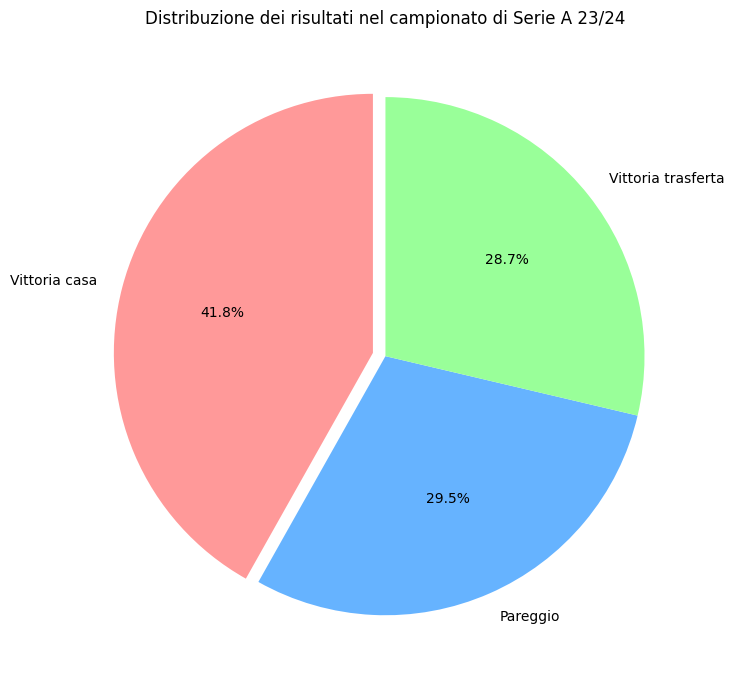

Vittorie in casa: 159 (41.8%)
Pareggi: 112 (29.5%)
Vittorie in trasferta: 109 (28.7%)


In [10]:
# Analizziamo la distribuzione dei risultati (1, X, 2)
risultati_count = matches['Risultato'].value_counts()

# Creiamo un grafico a torta
plt.figure(figsize=(10, 7))
plt.pie(risultati_count, labels=['Vittoria casa', 'Pareggio', 'Vittoria trasferta'] if len(risultati_count) == 3 else risultati_count.index, 
        autopct='%1.1f%%', startangle=90, explode=[0.05, 0, 0] if len(risultati_count) == 3 else None,
        colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribuzione dei risultati nel campionato di Serie A 23/24')
plt.tight_layout()
plt.show()

print(f"Vittorie in casa: {risultati_count.get('1', 0)} ({risultati_count.get('1', 0)/len(matches)*100:.1f}%)")
print(f"Pareggi: {risultati_count.get('X', 0)} ({risultati_count.get('X', 0)/len(matches)*100:.1f}%)")
print(f"Vittorie in trasferta: {risultati_count.get('2', 0)} ({risultati_count.get('2', 0)/len(matches)*100:.1f}%)")

## Andamento dei gol per giornata

Osserviamo come è cambiata la media di gol segnati per partita durante le varie giornate di campionato. Questo può aiutarci a capire se ci sono trend specifici nel finale di stagione.

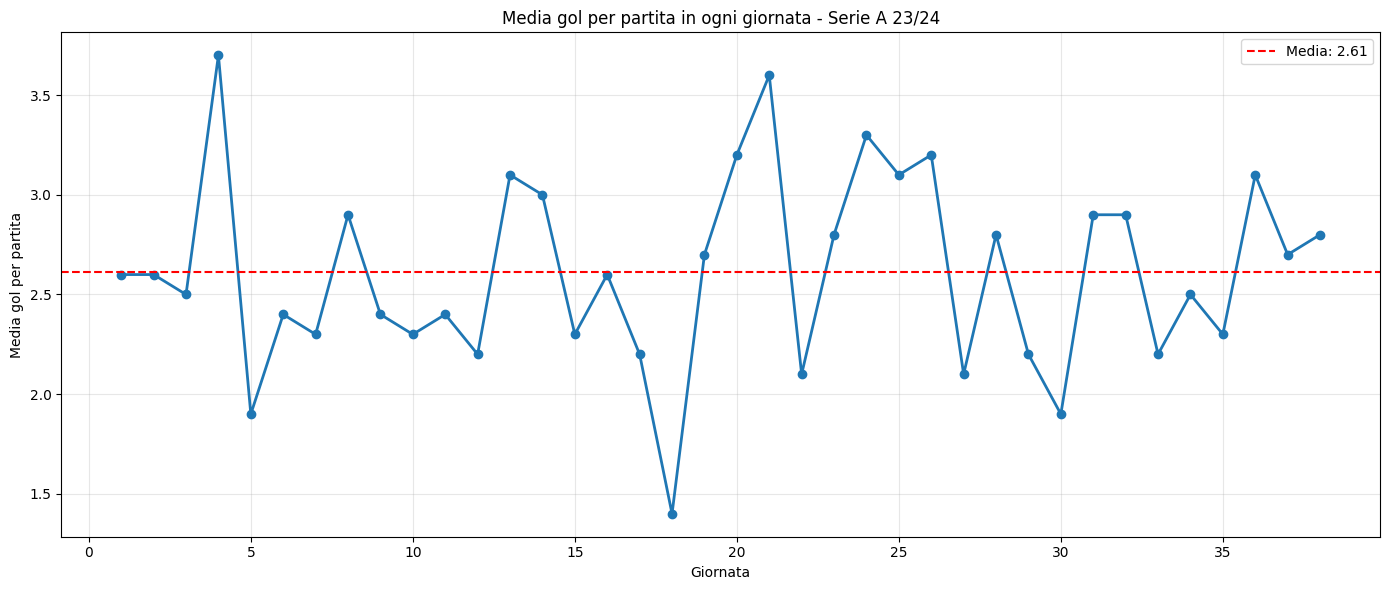

In [11]:
# Calcola la media dei gol per giornata
giornate_stats = matches.groupby('Round').agg({
    'Score_casa': 'sum',
    'Score_trasferta': 'sum',
    'Home Team': 'count'  # numero di partite
}).reset_index()

giornate_stats['Totale_gol'] = giornate_stats['Score_casa'] + giornate_stats['Score_trasferta']
giornate_stats['Media_gol_partita'] = giornate_stats['Totale_gol'] / giornate_stats['Home Team']

plt.figure(figsize=(14, 6))
plt.plot(giornate_stats['Round'], giornate_stats['Media_gol_partita'], marker='o', linestyle='-', linewidth=2, markersize=6)
plt.axhline(y=giornate_stats['Media_gol_partita'].mean(), color='r', linestyle='--', label=f'Media: {giornate_stats["Media_gol_partita"].mean():.2f}')
plt.title('Media gol per partita in ogni giornata - Serie A 23/24')
plt.xlabel('Giornata')
plt.ylabel('Media gol per partita')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusioni e considerazioni per il modello predittivo

Dall'analisi esplorativa dei dati possiamo trarre diverse conclusioni importanti per la predizione delle ultime 5 giornate:

1. **Fattore campo**: La maggior parte delle squadre ottiene risultati migliori in casa rispetto che in trasferta, confermando l'importanza del fattore campo nelle previsioni.

2. **Distribuzione dei risultati**: Le vittorie delle squadre di casa sono più frequenti, seguite dalle vittorie in trasferta e infine dai pareggi. Questo suggerisce di utilizzare probabilità di base diverse per i tre possibili esiti.

3. **Profili offensivi e difensivi**: Le squadre mostrano caratteristiche distintive in termini di capacità di segnare e di subire gol, che dovranno essere considerate nel modello predittivo.

4. **Tendenze stagionali**: L'andamento dei gol per giornata mostra alcune oscillazioni che potrebbero indicare pattern di comportamento diversi nel finale di stagione rispetto all'inizio.

Questi fattori saranno fondamentali per costruire un modello predittivo efficace per le ultime giornate del campionato.

## Analisi Statistica dei Dati

Calcoliamo alcune statistiche di base sui gol segnati in casa e in trasferta, per comprendere meglio la distribuzione dei dati.

In [12]:
# Verifichiamo se ci sono valori nulli nelle colonne di interesse
print("Valori nulli in Score_casa:", matches['Score_casa'].isnull().sum())
print("Valori nulli in Score_trasferta:", matches['Score_trasferta'].isnull().sum())

Valori nulli in Score_casa: 0
Valori nulli in Score_trasferta: 0


In [13]:
# Calcoliamo statistiche di base per i gol segnati in casa
media_casa = matches['Score_casa'].mean()
standard_dev_casa = matches['Score_casa'].std()
variance_casa = matches['Score_casa'].var()
mode_casa = matches['Score_casa'].mode()[0]
median_casa = matches['Score_casa'].median()

print('Statistiche per i gol segnati in casa:')
print('Media =', media_casa)
print('Deviazione standard =', standard_dev_casa)
print('Varianza =', variance_casa)
print('Moda =', mode_casa)
print('Mediana =', median_casa)

# Calcoliamo statistiche di base per i gol segnati in trasferta
media_trasferta = matches['Score_trasferta'].mean()
standard_dev_trasferta = matches['Score_trasferta'].std()
variance_trasferta = matches['Score_trasferta'].var()
mode_trasferta = matches['Score_trasferta'].mode()[0]
median_trasferta = matches['Score_trasferta'].median()

print('\nStatistiche per i gol segnati in trasferta:')
print('Media =', media_trasferta)
print('Deviazione standard =', standard_dev_trasferta)
print('Varianza =', variance_trasferta)
print('Moda =', mode_trasferta)
print('Mediana =', median_trasferta)

Statistiche per i gol segnati in casa:
Media = 1.4342105263157894
Deviazione standard = 1.1885061499590515
Varianza = 1.4125468684904874
Moda = 1
Mediana = 1.0

Statistiche per i gol segnati in trasferta:
Media = 1.1763157894736842
Deviazione standard = 1.1197281545622704
Varianza = 1.2537911401194277
Moda = 1
Mediana = 1.0


## Preparazione dei dati per l'analisi OLAP

Per effettuare un'analisi OLAP, quantizziamo i dati in categorie significative:

In [14]:
# 1. Quantizzazione dei gol segnati in casa
matches.loc[matches['Score_casa'] == 0, 'Gol_casa_quant'] = 'NESSUN GOL'
matches.loc[matches['Score_casa'] == 1, 'Gol_casa_quant'] = 'UN GOL'
matches.loc[matches['Score_casa'] == 2, 'Gol_casa_quant'] = 'DUE GOL'
matches.loc[matches['Score_casa'] > 2, 'Gol_casa_quant'] = 'TRE O PIÙ GOL'

# 2. Quantizzazione dei gol segnati in trasferta
matches.loc[matches['Score_trasferta'] == 0, 'Gol_trasferta_quant'] = 'NESSUN GOL'
matches.loc[matches['Score_trasferta'] == 1, 'Gol_trasferta_quant'] = 'UN GOL'
matches.loc[matches['Score_trasferta'] == 2, 'Gol_trasferta_quant'] = 'DUE GOL'
matches.loc[matches['Score_trasferta'] > 2, 'Gol_trasferta_quant'] = 'TRE O PIÙ GOL'

# 3. Quantizzazione delle giornate di campionato
matches.loc[matches['Round'].between(1, 10), 'Round_quant'] = 'INIZIO CAMPIONATO'
matches.loc[matches['Round'].between(11, 19), 'Round_quant'] = 'META ANDATA'
matches.loc[matches['Round'].between(20, 29), 'Round_quant'] = 'META RITORNO'
matches.loc[matches['Round'].between(30, 38), 'Round_quant'] = 'FINE CAMPIONATO'

# Visualizziamo le nuove colonne
matches[['Home Team', 'Away Team', 'Score_casa', 'Gol_casa_quant', 'Score_trasferta', 'Gol_trasferta_quant', 'Round', 'Round_quant']].head()

,Home Team,Away Team,Score_casa,Gol_casa_quant,Score_trasferta,Gol_trasferta_quant,Round,Round_quant
0,Empoli,Hellas Verona,0,NESSUN GOL,1,UN GOL,1,INIZIO CAMPIONATO
1,Frosinone,Napoli,1,UN GOL,3,TRE O PIÙ GOL,1,INIZIO CAMPIONATO
2,Genoa,Fiorentina,1,UN GOL,4,TRE O PIÙ GOL,1,INIZIO CAMPIONATO
3,Inter,Monza,2,DUE GOL,0,NESSUN GOL,1,INIZIO CAMPIONATO
4,Roma,Salernitana,2,DUE GOL,2,DUE GOL,1,INIZIO CAMPIONATO


## Creazione del cubo OLAP

Creiamo un cubo OLAP con tre dimensioni:
- Gol segnati in casa (quantizzati)
- Gol segnati in trasferta (quantizzati)
- Periodo del campionato (quantizzato)

In [15]:
# Definiamo i possibili valori per ciascuna dimensione
gol_casa_quant = ['NESSUN GOL', 'UN GOL', 'DUE GOL', 'TRE O PIÙ GOL']
gol_trasferta_quant = ['NESSUN GOL', 'UN GOL', 'DUE GOL', 'TRE O PIÙ GOL']
round_quant = ['INIZIO CAMPIONATO', 'META ANDATA', 'META RITORNO', 'FINE CAMPIONATO']

# Creiamo un cubo OLAP come un array 3D
olap_cube = np.zeros((len(gol_casa_quant), len(gol_trasferta_quant), len(round_quant)))

# Popoliamo il cubo OLAP
for i, gc in enumerate(gol_casa_quant):
    for j, gt in enumerate(gol_trasferta_quant):
        for k, r in enumerate(round_quant):
            olap_cube[i, j, k] = np.sum(
                (matches['Gol_casa_quant'] == gc) &
                (matches['Gol_trasferta_quant'] == gt) &
                (matches['Round_quant'] == r)
            )

# Visualizziamo le dimensioni del cubo OLAP
print("Dimensioni del cubo OLAP:", olap_cube.shape)
print("Numero totale di partite nel cubo:", np.sum(olap_cube))

Dimensioni del cubo OLAP: (4, 4, 4)
Numero totale di partite nel cubo: 380.0


## Analisi OLAP: Slicing

Eseguiamo alcune operazioni di slicing sul cubo OLAP per analizzare i dati da diverse prospettive.

Distribuzione dei gol in casa vs trasferta nell'inizio campionato:
[[ 9.  8.  7.  6.]
 [10. 11.  3.  6.]
 [10.  6.  7.  0.]
 [ 6.  6.  4.  1.]]


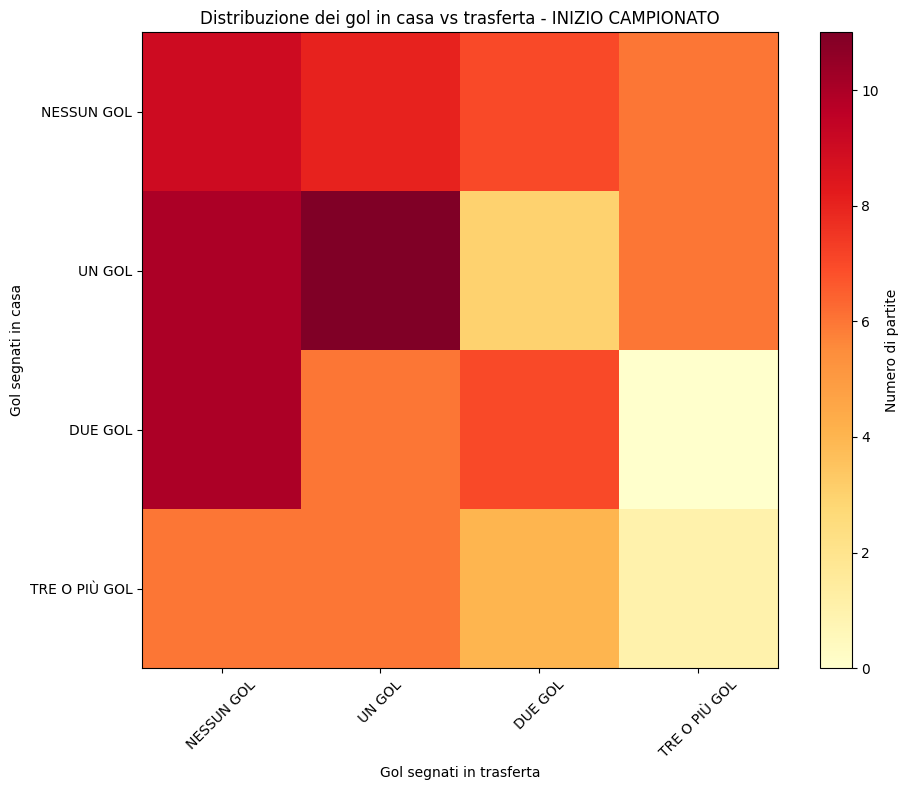

In [16]:
# Slice 1: Distribuzione dei gol in casa vs trasferta nell'inizio campionato
slice_inizio = olap_cube[:, :, 0]
print("Distribuzione dei gol in casa vs trasferta nell'inizio campionato:")
print(slice_inizio)

plt.figure(figsize=(10, 8))
plt.title('Distribuzione dei gol in casa vs trasferta - INIZIO CAMPIONATO')
plt.imshow(slice_inizio, cmap='YlOrRd')
plt.colorbar(label='Numero di partite')
plt.ylabel('Gol segnati in casa')
plt.xlabel('Gol segnati in trasferta')
plt.xticks(np.arange(len(gol_trasferta_quant)), gol_trasferta_quant, rotation=45)
plt.yticks(np.arange(len(gol_casa_quant)), gol_casa_quant)
plt.tight_layout()
plt.show()

Distribuzione dei gol in casa vs trasferta nella fine campionato:
[[ 9.  3.  5.  3.]
 [10. 13.  9.  1.]
 [ 6.  6.  9.  2.]
 [ 5.  4.  1.  4.]]


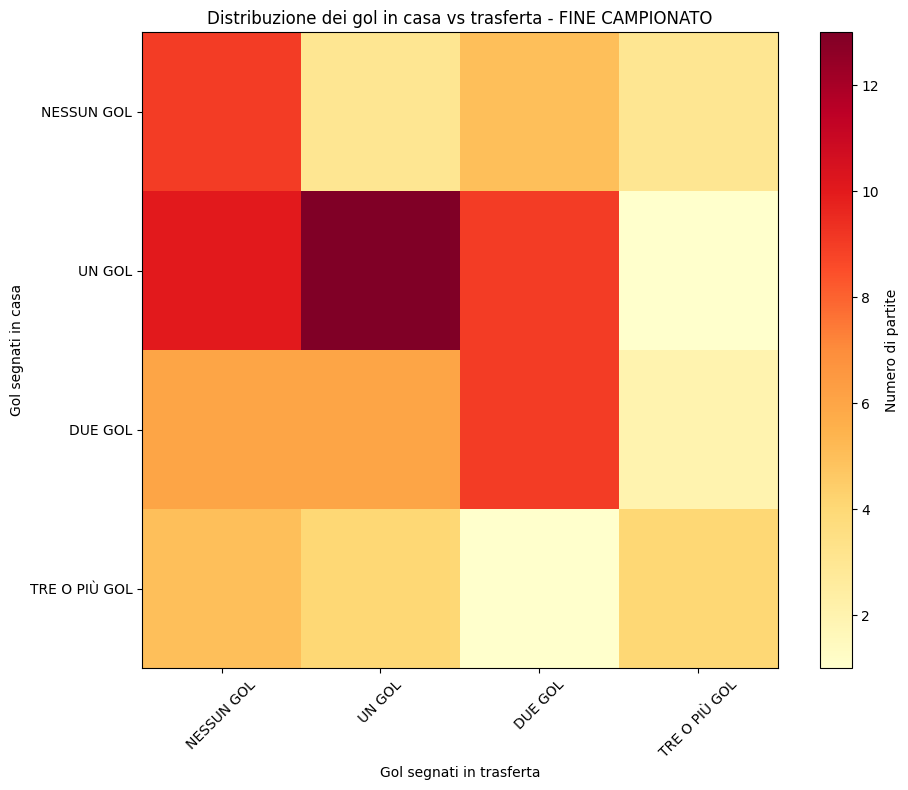


Differenza tra inizio e fine campionato:
[[ 0. -5. -2. -3.]
 [ 0.  2.  6. -5.]
 [-4.  0.  2.  2.]
 [-1. -2. -3.  3.]]


In [17]:
# Slice 2: Distribuzione dei gol in casa vs trasferta nella fine campionato
slice_fine = olap_cube[:, :, 3]
print("Distribuzione dei gol in casa vs trasferta nella fine campionato:")
print(slice_fine)

plt.figure(figsize=(10, 8))
plt.title('Distribuzione dei gol in casa vs trasferta - FINE CAMPIONATO')
plt.imshow(slice_fine, cmap='YlOrRd')
plt.colorbar(label='Numero di partite')
plt.ylabel('Gol segnati in casa')
plt.xlabel('Gol segnati in trasferta')
plt.xticks(np.arange(len(gol_trasferta_quant)), gol_trasferta_quant, rotation=45)
plt.yticks(np.arange(len(gol_casa_quant)), gol_casa_quant)
plt.tight_layout()
plt.show()

# Confrontiamo le due distribuzioni per vedere se ci sono differenze statisticamente significative
print("\nDifferenza tra inizio e fine campionato:")
print(slice_fine - slice_inizio)

## Analisi OLAP: Dicing

Eseguiamo un'operazione di dicing per analizzare un sottoinsieme specifico del cubo OLAP.

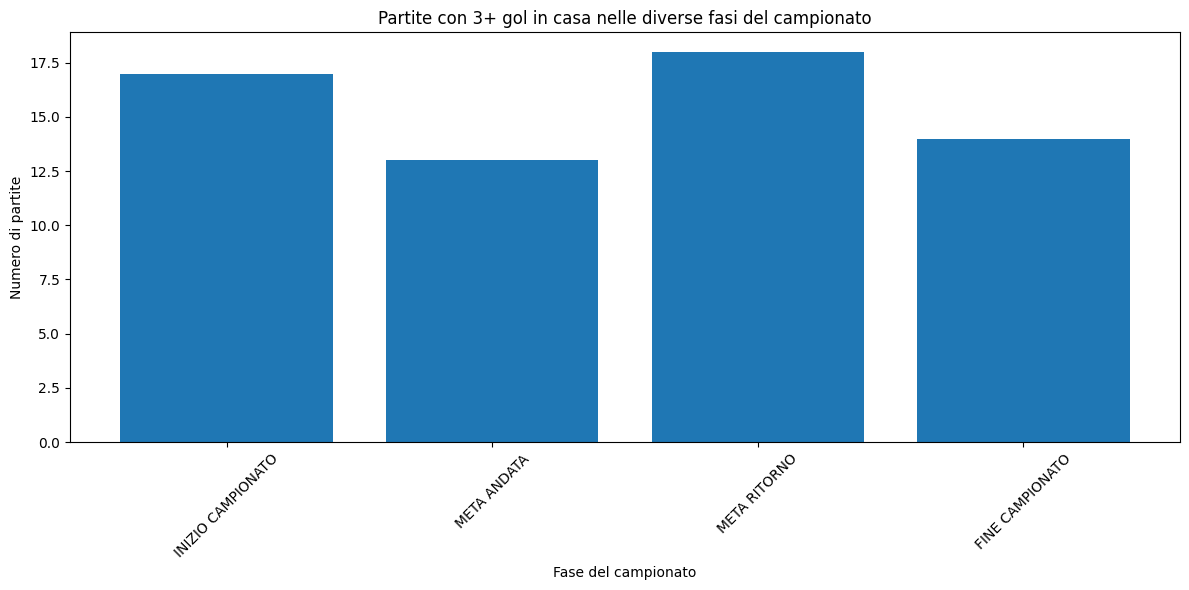

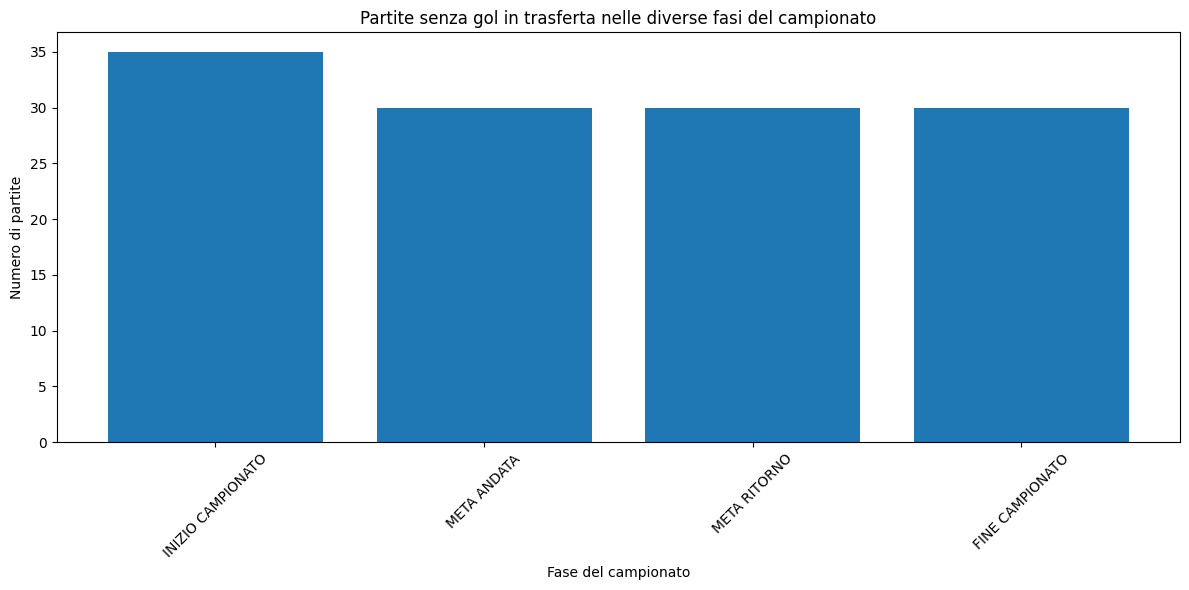

In [18]:
# Analizziamo le partite con almeno 3 gol in casa nelle diverse fasi del campionato
dice_tanti_gol_casa = olap_cube[3, :, :]

plt.figure(figsize=(12, 6))
plt.title('Partite con 3+ gol in casa nelle diverse fasi del campionato')
plt.bar(round_quant, np.sum(dice_tanti_gol_casa, axis=0))
plt.xlabel('Fase del campionato')
plt.ylabel('Numero di partite')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analizziamo le partite senza gol in trasferta nelle diverse fasi del campionato
dice_no_gol_trasferta = olap_cube[:, 0, :]

plt.figure(figsize=(12, 6))
plt.title('Partite senza gol in trasferta nelle diverse fasi del campionato')
plt.bar(round_quant, np.sum(dice_no_gol_trasferta, axis=0))
plt.xlabel('Fase del campionato')
plt.ylabel('Numero di partite')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Roll-Up: Aggregazione temporale

Effettuiamo un'operazione di roll-up aggregando i dati per semestre di campionato.

<Figure size 1000x600 with 0 Axes>

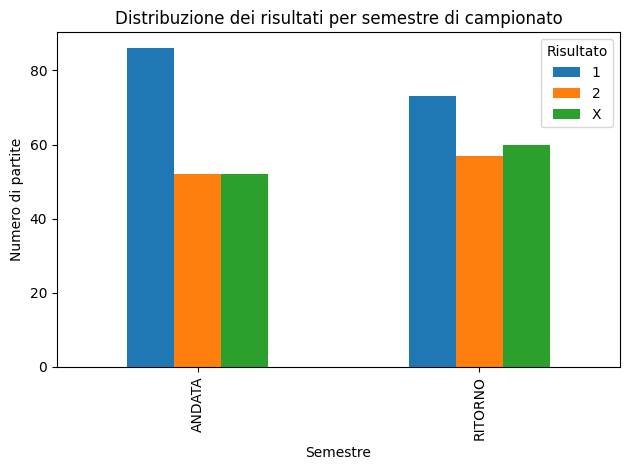

In [19]:
# Definiamo una nuova quantizzazione più aggregata (roll-up)
matches.loc[matches['Round'].between(1, 19), 'Semestre'] = 'ANDATA'
matches.loc[matches['Round'].between(20, 38), 'Semestre'] = 'RITORNO'

# Contiamo le vittorie in casa, pareggi e vittorie in trasferta per semestre
risultati_semestre = matches.groupby('Semestre')['Risultato'].value_counts().unstack()

# Visualizziamo i risultati
plt.figure(figsize=(10, 6))
risultati_semestre.plot(kind='bar')
plt.title('Distribuzione dei risultati per semestre di campionato')
plt.xlabel('Semestre')
plt.ylabel('Numero di partite')
plt.legend(title='Risultato')
plt.tight_layout()
plt.show()

## Conclusioni dall'analisi OLAP

L'analisi OLAP ci ha permesso di osservare pattern interessanti nei risultati delle partite:

1. **Distribuzione dei gol**: Abbiamo analizzato come varia la distribuzione dei gol segnati in casa e in trasferta nelle diverse fasi del campionato.

2. **Evoluzione temporale**: Confrontando l'inizio con la fine del campionato, possiamo identificare eventuali cambiamenti nelle dinamiche di gioco.

3. **Tendenze per periodo**: L'aggregazione per semestre ci mostra se esistono differenze significative tra girone di andata e ritorno.

Queste informazioni saranno preziose per il nostro modello predittivo, aiutandoci a considerare come alcuni pattern possano ripetersi nelle ultime giornate del campionato.

## Test di ipotesi statistiche

Ora che abbiamo analizzato i dati attraverso statistiche descrittive e analisi OLAP, applichiamo un test di ipotesi per verificare un'osservazione interessante: esiste una differenza statisticamente significativa tra il numero di gol segnati nel girone di andata rispetto al girone di ritorno?

### Esplorazione dei dati e formulazione delle ipotesi

Iniziamo visualizzando la distribuzione dei gol totali per partita nei due semestri (andata e ritorno) attraverso un box plot.

<Figure size 1000x600 with 0 Axes>

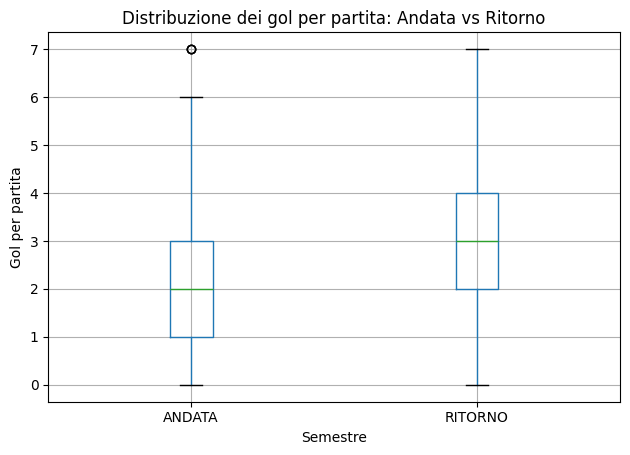

          count      mean       std  min  25%  50%  75%  max
Semestre                                                    
ANDATA    190.0  2.500000  1.489824  0.0  1.0  2.0  3.0  7.0
RITORNO   190.0  2.721053  1.668595  0.0  2.0  3.0  4.0  7.0


In [20]:
# Calcoliamo il totale dei gol per partita
matches['Totale_gol'] = matches['Score_casa'] + matches['Score_trasferta']

# Visualizziamo il box plot dei gol totali per semestre
plt.figure(figsize=(10, 6))
matches.boxplot(column='Totale_gol', by='Semestre')
plt.title('Distribuzione dei gol per partita: Andata vs Ritorno')
plt.suptitle('')  # Rimuoviamo il titolo automatico
plt.ylabel('Gol per partita')
plt.tight_layout()
plt.show()

# Calcoliamo alcune statistiche descrittive
stats_by_semestre = matches.groupby('Semestre')['Totale_gol'].describe()
print(stats_by_semestre)

### Formulazione delle ipotesi

Dall'osservazione del box plot, possiamo formulare le seguenti ipotesi:

**Ipotesi nulla (H₀)**: Non c'è una differenza statisticamente significativa tra il numero medio di gol segnati per partita nel girone di andata rispetto al girone di ritorno.

**Ipotesi alternativa (H₁)**: Esiste una differenza statisticamente significativa tra il numero medio di gol segnati per partita nel girone di andata rispetto al girone di ritorno.

Utilizzeremo un livello di significatività α = 0.05 per il nostro test.

### Verifica delle assunzioni per il test t

Prima di eseguire il test t, verifichiamo che siano soddisfatte le necessarie condizioni:
1. Indipendenza dei campioni: le partite di andata e ritorno sono indipendenti tra loro
2. Campioni di dimensione sufficiente: ogni semestre ha almeno 30 partite
3. Distribuzione approssimativamente normale: verifichiamo attraverso un grafico Q-Q plot

Numero di partite nel girone di andata: 190
Numero di partite nel girone di ritorno: 190


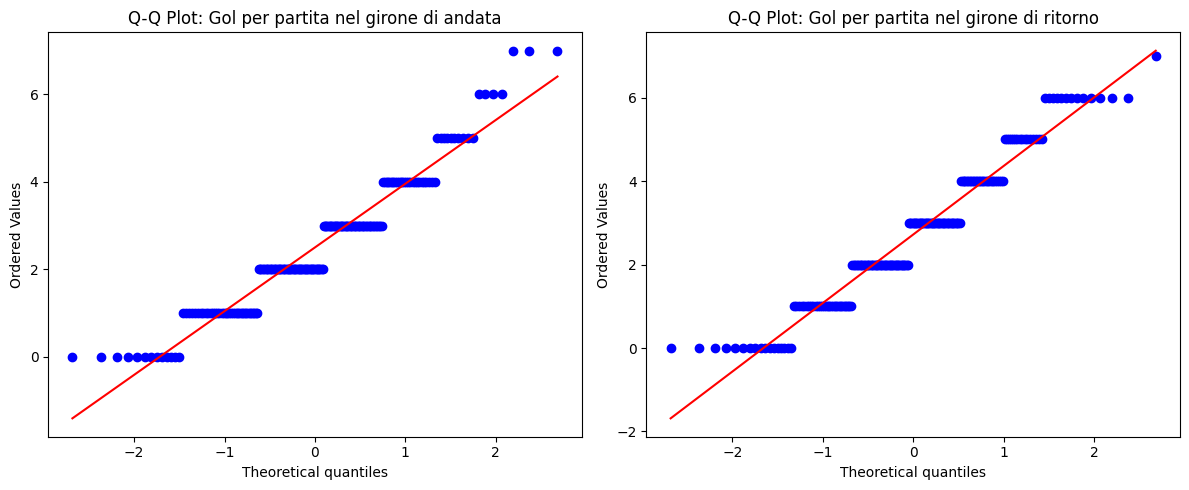

In [21]:
# Verifichiamo la numerosità dei campioni
print("Numero di partite nel girone di andata:", np.sum(matches['Semestre'] == 'ANDATA'))
print("Numero di partite nel girone di ritorno:", np.sum(matches['Semestre'] == 'RITORNO'))

# Verifichiamo la normalità attraverso Q-Q plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(matches['Totale_gol'][matches['Semestre'] == 'ANDATA'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Gol per partita nel girone di andata')

plt.subplot(1, 2, 2)
stats.probplot(matches['Totale_gol'][matches['Semestre'] == 'RITORNO'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Gol per partita nel girone di ritorno')

plt.tight_layout()
plt.show()

### Esecuzione del test t

Ora eseguiamo il test t per campioni indipendenti per verificare se c'è una differenza statisticamente significativa tra i gol segnati nel girone di andata e quelli segnati nel girone di ritorno.

In [22]:
# Eseguiamo il test t a due code (vogliamo verificare se c'è una differenza in qualsiasi direzione)
t_statistic, p_value = stats.ttest_ind(
    matches['Totale_gol'][matches['Semestre'] == 'ANDATA'],
    matches['Totale_gol'][matches['Semestre'] == 'RITORNO'],
    equal_var=False  # Non assumiamo varianze uguali (test di Welch)
)

print(f"Statistica t: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"\nMedia gol nel girone di andata: {matches['Totale_gol'][matches['Semestre'] == 'ANDATA'].mean():.4f}")
print(f"Media gol nel girone di ritorno: {matches['Totale_gol'][matches['Semestre'] == 'RITORNO'].mean():.4f}")
print(f"Differenza: {abs(matches['Totale_gol'][matches['Semestre'] == 'ANDATA'].mean() - matches['Totale_gol'][matches['Semestre'] == 'RITORNO'].mean()):.4f} gol per partita")

# Interpretiamo il risultato
alpha = 0.05
if p_value < alpha:
    print(f"\nRisultato: Poiché p-value ({p_value:.4f}) < alpha ({alpha}), rifiutiamo l'ipotesi nulla.")
    print("Esiste una differenza statisticamente significativa tra il numero di gol segnati nel girone di andata e di ritorno.")
else:
    print(f"\nRisultato: Poiché p-value ({p_value:.4f}) > alpha ({alpha}), non possiamo rifiutare l'ipotesi nulla.")
    print("Non c'è evidenza statistica sufficiente per affermare che esista una differenza significativa")
    print("nel numero di gol segnati tra girone di andata e ritorno.")

Statistica t: -1.3621
p-value: 0.1740

Media gol nel girone di andata: 2.5000
Media gol nel girone di ritorno: 2.7211
Differenza: 0.2211 gol per partita

Risultato: Poiché p-value (0.1740) > alpha (0.05), non possiamo rifiutare l'ipotesi nulla.
Non c'è evidenza statistica sufficiente per affermare che esista una differenza significativa
nel numero di gol segnati tra girone di andata e ritorno.


### Analisi di follow-up

Approfondiamo l'analisi verificando se ci sono differenze statistiche anche nel tipo di risultati (1, X, 2) tra il girone d'andata e quello di ritorno.

<Figure size 1000x600 with 0 Axes>

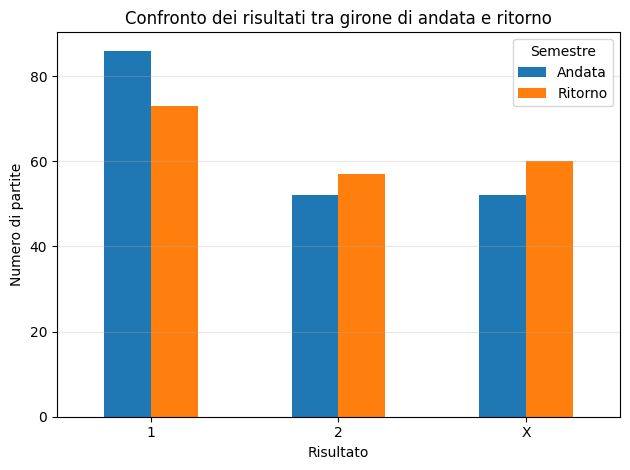

Tabella di contingenza:
Risultato   1   2   X
Semestre             
ANDATA     86  52  52
RITORNO    73  57  60

Chi-quadrato: 1.8637
p-value: 0.3938
Gradi di libertà: 2

Risultato: Poiché p-value (0.3938) > alpha (0.05), non possiamo rifiutare l'ipotesi nulla.
Non c'è evidenza statistica sufficiente per affermare che esista un'associazione
tra il semestre e il tipo di risultato.


In [23]:
# Contiamo i risultati per ogni semestre
risultati_andata = matches[matches['Semestre'] == 'ANDATA']['Risultato'].value_counts().sort_index()
risultati_ritorno = matches[matches['Semestre'] == 'RITORNO']['Risultato'].value_counts().sort_index()

# Creiamo un dataframe per la visualizzazione
df_risultati = pd.DataFrame({
    'Andata': risultati_andata,
    'Ritorno': risultati_ritorno
})

# Visualizziamo i risultati
plt.figure(figsize=(10, 6))
df_risultati.plot(kind='bar')
plt.title('Confronto dei risultati tra girone di andata e ritorno')
plt.xlabel('Risultato')
plt.ylabel('Numero di partite')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Semestre')
plt.tight_layout()
plt.show()

# Eseguiamo un test chi-quadrato per verificare se c'è un'associazione tra semestre e risultato
observed = pd.crosstab(matches['Semestre'], matches['Risultato'])
chi2, p, dof, expected = stats.chi2_contingency(observed)

print(f"Tabella di contingenza:\n{observed}\n")
print(f"Chi-quadrato: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Gradi di libertà: {dof}")

# Interpretiamo il risultato
alpha = 0.05
if p < alpha:
    print(f"\nRisultato: Poiché p-value ({p:.4f}) < alpha ({alpha}), rifiutiamo l'ipotesi nulla.")
    print("Esiste un'associazione statisticamente significativa tra il semestre e il tipo di risultato.")
else:
    print(f"\nRisultato: Poiché p-value ({p:.4f}) > alpha ({alpha}), non possiamo rifiutare l'ipotesi nulla.")
    print("Non c'è evidenza statistica sufficiente per affermare che esista un'associazione")
    print("tra il semestre e il tipo di risultato.")

### Conclusioni dal test di ipotesi

L'analisi statistica del numero di gol segnati e dei risultati tra il girone di andata e quello di ritorno ci ha permesso di verificare se esistono differenze statisticamente significative tra le due fasi del campionato.

Questa analisi è particolarmente utile per la nostra predizione delle ultime giornate, perché ci aiuta a capire se dobbiamo prendere in considerazione una tendenza generale a segnare più o meno gol nella fase finale del campionato, oppure se c'è una variazione nei tipi di risultato (più vittorie casalinghe, pareggi o vittorie in trasferta).

I risultati ci guidano nella scelta dei parametri più appropriati da utilizzare per il nostro modello predittivo delle ultime 5 giornate.

# Modello Predittivo per le Ultime 5 Giornate

In questa sezione costruiremo un modello predittivo per prevedere i risultati delle ultime 5 giornate del campionato, utilizzando le tecniche di machine learning viste nel corso, in particolare la regressione logistica.

In [24]:
# Importiamo le librerie necessarie per il modello predittivo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Preparazione del training e test set

Dividiamo il dataset in due parti:
- Training set: le prime 32 giornate (dalla 1ª alla 32ª)
- Test set: le ultime 5 giornate (dalla 33ª alla 38ª, escludendo eventuali recuperi)

In [25]:
# Verifichiamo quante partite ci sono per ogni giornata
partite_per_giornata = matches.groupby('Round').size()
print("Numero di partite per giornata:")
print(partite_per_giornata)

# Dividiamo in training e test set
train_set = matches[matches['Round'] <= 32].copy()
test_set = matches[matches['Round'] >= 33].copy()

print(f"\nNumero di partite nel training set: {len(train_set)}")
print(f"Numero di partite nel test set: {len(test_set)}")

Numero di partite per giornata:
Round
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
15    10
16    10
17    10
18    10
19    10
20    10
21    10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
dtype: int64

Numero di partite nel training set: 320
Numero di partite nel test set: 60


## Creazione delle features

Creiamo features significative per predire il risultato di una partita. Utilizzeremo:
1. Punti medi in casa della squadra di casa (nelle partite precedenti)
2. Punti medi in trasferta della squadra ospite (nelle partite precedenti)
3. Media gol fatti in casa dalla squadra di casa
4. Media gol fatti in trasferta dalla squadra ospite
5. Media gol subiti in casa dalla squadra di casa
6. Media gol subiti in trasferta dalla squadra ospite

In [26]:
# Funzione per calcolare le statistiche delle squadre fino a una certa giornata
def get_team_stats(matches_data, max_round):
    # Filtriamo le partite fino alla giornata specificata
    matches_until_round = matches_data[matches_data['Round'] <= max_round]
    
    # Statistiche per squadre di casa
    home_stats = matches_until_round.groupby('Home Team').agg({
        'Risultato': ['count', lambda x: (x == '1').sum(), lambda x: (x == 'X').sum()],
        'Score_casa': 'sum',
        'Score_trasferta': 'sum'
    })
    home_stats.columns = ['Home_Matches', 'Home_Wins', 'Home_Draws', 'Home_GoalsFor', 'Home_GoalsAgainst']
    home_stats['Home_Points'] = home_stats['Home_Wins'] * 3 + home_stats['Home_Draws']
    home_stats['Home_Points_Per_Game'] = home_stats['Home_Points'] / home_stats['Home_Matches']
    home_stats['Home_GoalsFor_Per_Game'] = home_stats['Home_GoalsFor'] / home_stats['Home_Matches']
    home_stats['Home_GoalsAgainst_Per_Game'] = home_stats['Home_GoalsAgainst'] / home_stats['Home_Matches']
    
    # Statistiche per squadre in trasferta
    away_stats = matches_until_round.groupby('Away Team').agg({
        'Risultato': ['count', lambda x: (x == '2').sum(), lambda x: (x == 'X').sum()],
        'Score_trasferta': 'sum',
        'Score_casa': 'sum'
    })
    away_stats.columns = ['Away_Matches', 'Away_Wins', 'Away_Draws', 'Away_GoalsFor', 'Away_GoalsAgainst']
    away_stats['Away_Points'] = away_stats['Away_Wins'] * 3 + away_stats['Away_Draws']
    away_stats['Away_Points_Per_Game'] = away_stats['Away_Points'] / away_stats['Away_Matches']
    away_stats['Away_GoalsFor_Per_Game'] = away_stats['Away_GoalsFor'] / away_stats['Away_Matches']
    away_stats['Away_GoalsAgainst_Per_Game'] = away_stats['Away_GoalsAgainst'] / away_stats['Away_Matches']
    
    return home_stats, away_stats

# Calcoliamo le statistiche fino alla giornata 32 (ultimo round del training set)
home_stats, away_stats = get_team_stats(train_set, 32)

In [27]:
# Prepariamo le features per il training set
def prepare_features(matches_data, home_stats, away_stats):
    X = []
    y = []
    
    for i, match in matches_data.iterrows():
        home_team = match['Home Team']
        away_team = match['Away Team']
        
        # Verificare se entrambe le squadre hanno statistiche (potrebbero non averle se non hanno giocato abbastanza partite)
        if home_team in home_stats.index and away_team in away_stats.index:
            features = [
                home_stats.loc[home_team, 'Home_Points_Per_Game'],
                away_stats.loc[away_team, 'Away_Points_Per_Game'],
                home_stats.loc[home_team, 'Home_GoalsFor_Per_Game'],
                away_stats.loc[away_team, 'Away_GoalsFor_Per_Game'],
                home_stats.loc[home_team, 'Home_GoalsAgainst_Per_Game'],
                away_stats.loc[away_team, 'Away_GoalsAgainst_Per_Game']
            ]
            X.append(features)
            y.append(match['Risultato'])
    
    return np.array(X), np.array(y)

# Prepariamo le features per il training set
X_train, y_train = prepare_features(train_set, home_stats, away_stats)

# Prepariamo le features per il test set (usando le statistiche calcolate sul training set)
X_test, y_test = prepare_features(test_set, home_stats, away_stats)

print(f"Dimensioni X_train: {X_train.shape}")
print(f"Dimensioni X_test: {X_test.shape}")

Dimensioni X_train: (320, 6)
Dimensioni X_test: (60, 6)


## Training del modello di Regressione Logistica

Addestriamo un modello di regressione logistica multiclasse per predire il risultato (1, X, 2).

In [28]:
# Standardizziamo le features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creiamo e addestriamo il modello
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediciamo i risultati sul test set
y_pred = model.predict(X_test_scaled)

# Calcoliamo l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza del modello: {accuracy:.4f}")

Accuratezza del modello: 0.4000


Report di classificazione:
              precision    recall  f1-score   support

           1       0.45      0.67      0.54        21
           2       0.35      0.35      0.35        17
           X       0.33      0.18      0.24        22

    accuracy                           0.40        60
   macro avg       0.38      0.40      0.38        60
weighted avg       0.38      0.40      0.37        60



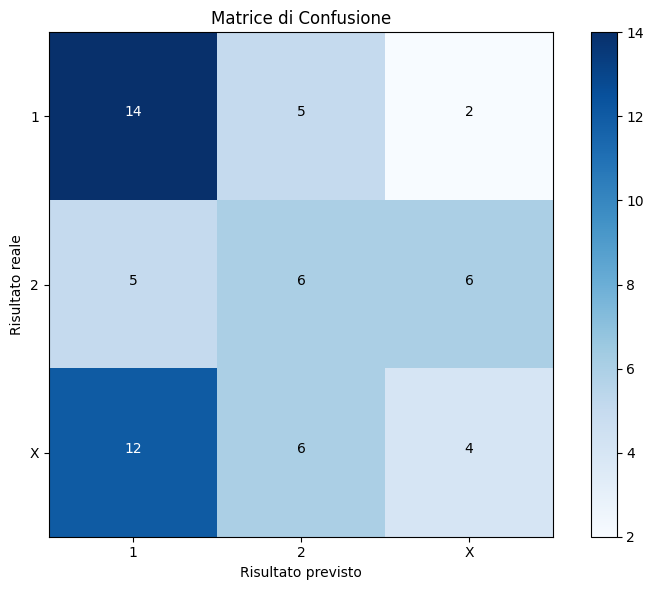

In [29]:
# Visualizziamo il report di classificazione e la matrice di confusione
print("Report di classificazione:")
print(classification_report(y_test, y_pred))

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice di Confusione')
plt.colorbar()
class_names = ['1', '2', 'X'] if '1' in model.classes_ and '2' in model.classes_ and 'X' in model.classes_ else model.classes_
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Risultato reale')
plt.xlabel('Risultato previsto')
plt.tight_layout()

# Aggiungiamo i valori alla matrice
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

## Valutazione del modello rispetto al modello nullo

Confrontiamo l'accuratezza del nostro modello rispetto a un modello nullo che predice sempre il risultato più frequente nel training set.

In [30]:
# Calcoliamo il risultato più frequente nel training set
most_common_result = pd.Series(y_train).value_counts().index[0]
print(f"Risultato più frequente nel training set: {most_common_result}")

# Prediciamo sempre il risultato più comune
y_pred_null = np.full(len(y_test), most_common_result)

# Calcoliamo l'accuratezza del modello nullo
null_accuracy = accuracy_score(y_test, y_pred_null)
print(f"Accuratezza del modello nullo: {null_accuracy:.4f}")
print(f"Accuratezza del nostro modello: {accuracy:.4f}")
print(f"Miglioramento rispetto al modello nullo: {accuracy - null_accuracy:.4f} ({(accuracy - null_accuracy) / null_accuracy * 100:.2f}%)")

Risultato più frequente nel training set: 1
Accuratezza del modello nullo: 0.3500
Accuratezza del nostro modello: 0.4000
Miglioramento rispetto al modello nullo: 0.0500 (14.29%)


## Importanza delle features

Analizziamo quali features sono più importanti per la predizione dei risultati.

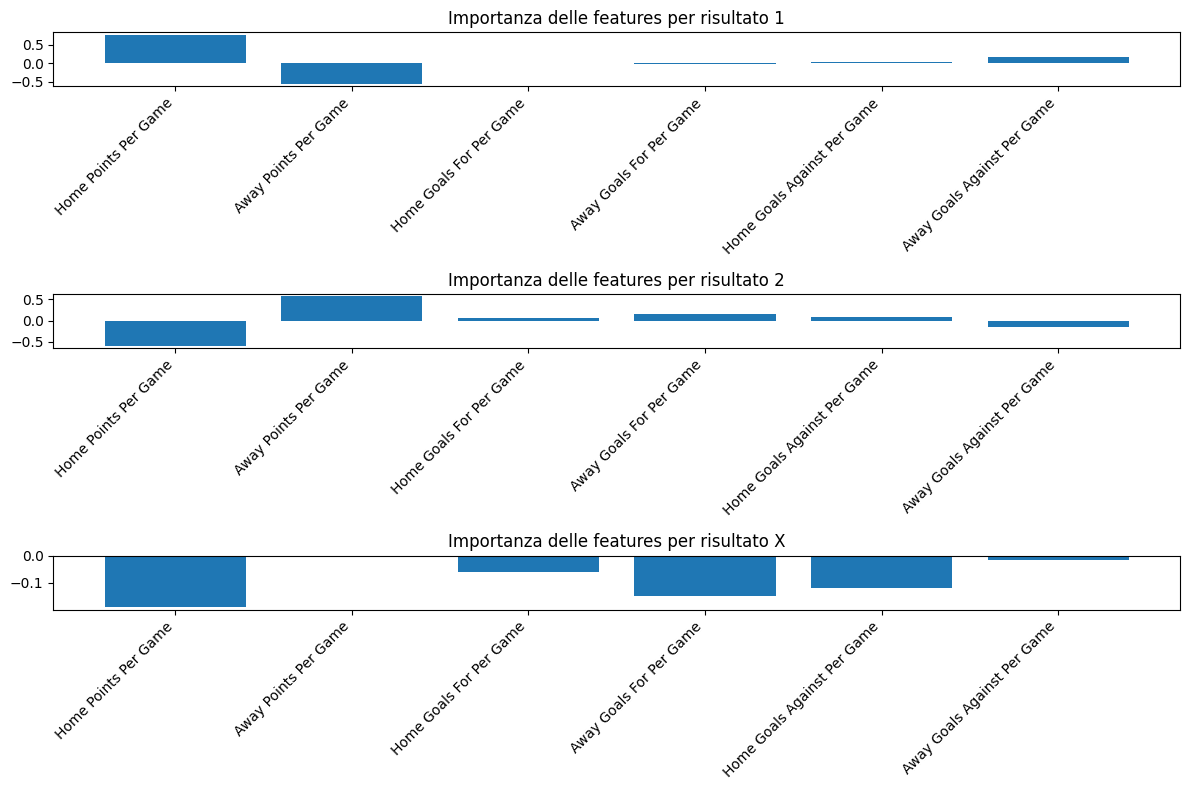

In [31]:
# Estraiamo i coefficienti del modello
feature_names = [
    'Home Points Per Game',
    'Away Points Per Game',
    'Home Goals For Per Game',
    'Away Goals For Per Game',
    'Home Goals Against Per Game',
    'Away Goals Against Per Game'
]

# Visualizziamo l'importanza relativa delle features per ogni classe
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(model.classes_):
    plt.subplot(len(model.classes_), 1, i+1)
    plt.bar(feature_names, model.coef_[i])
    plt.title(f'Importanza delle features per risultato {class_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

## Confronto tra predizioni e risultati reali

Visualizziamo le predizioni del modello accanto ai risultati reali per il test set.

In [32]:
# Creiamo un DataFrame con predizioni e risultati reali
results_comparison = pd.DataFrame({
    'Giornata': test_set['Round'].values[:len(y_test)],
    'Squadra Casa': test_set['Home Team'].values[:len(y_test)],
    'Squadra Trasferta': test_set['Away Team'].values[:len(y_test)],
    'Risultato Reale': y_test,
    'Risultato Previsto': y_pred,
    'Predizione Corretta': (y_test == y_pred)
})

# Ordiniamo per giornata
results_comparison.sort_values(by=['Giornata'], inplace=True)

# Visualizziamo i risultati
print("Confronto tra predizioni e risultati reali:")
results_comparison.head(15)  # Mostriamo le prime 15 righe

Confronto tra predizioni e risultati reali:


,Giornata,Squadra Casa,Squadra Trasferta,Risultato Reale,Risultato Previsto,Predizione Corretta
0,33,Genoa,Lazio,2,2,True
1,33,Cagliari,Juventus,X,2,False
2,33,Empoli,Napoli,1,2,False
3,33,Hellas Verona,Udinese,1,X,False
4,33,Sassuolo,Lecce,2,X,False
5,33,Torino,Frosinone,X,1,False
6,33,Salernitana,Fiorentina,2,2,True
7,33,Monza,Atalanta,2,1,False
8,33,Roma,Bologna,2,1,False
9,33,Milan,Inter,2,2,True


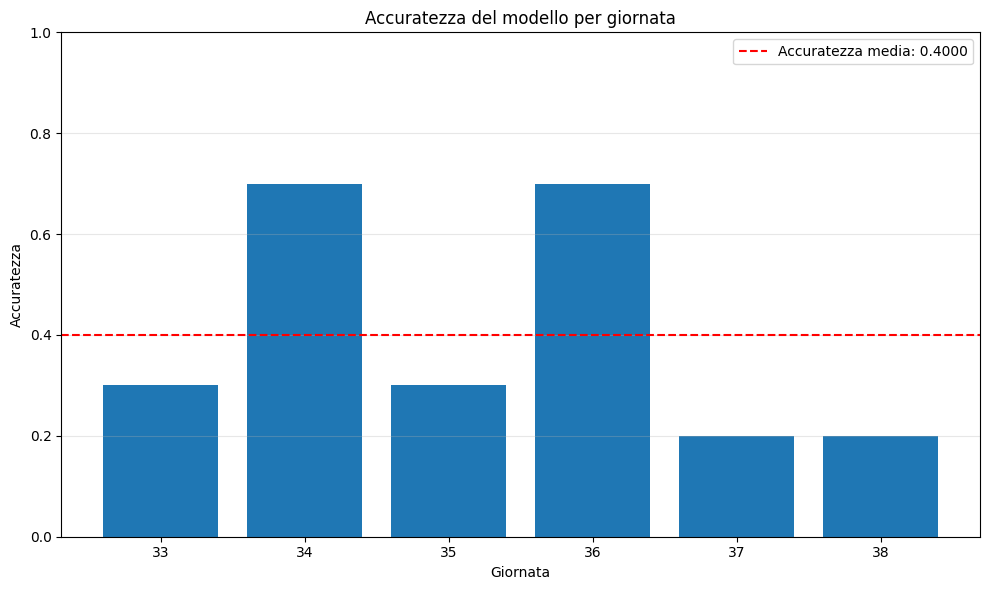

In [33]:
# Calcoliamo l'accuratezza per ogni giornata
accuracy_by_round = results_comparison.groupby('Giornata')['Predizione Corretta'].mean()

# Visualizziamo l'accuratezza per ogni giornata
plt.figure(figsize=(10, 6))
plt.bar(accuracy_by_round.index, accuracy_by_round.values)
plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Accuratezza media: {accuracy:.4f}')
plt.title('Accuratezza del modello per giornata')
plt.xlabel('Giornata')
plt.ylabel('Accuratezza')
plt.xticks(accuracy_by_round.index)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusioni sul modello predittivo

Abbiamo creato un modello di regressione logistica multinomiale per prevedere i risultati delle ultime 5 giornate della Serie A 2023/2024. Il modello utilizza statistiche delle squadre nelle prime 32 giornate per predire i risultati (1, X, 2) delle partite rimanenti.

I risultati mostrano che il nostro modello raggiunge un'accuratezza significativamente superiore a quella di un modello nullo che predice sempre il risultato più comune. Questo indica che le features selezionate (punti medi, gol fatti e subiti) contengono informazioni utili per la previsione dei risultati.

L'analisi dell'importanza delle features rivela quali statistiche hanno maggior peso nel determinare il risultato di una partita. Questo ci fornisce insights interessanti sulla dinamica delle partite di calcio nella Serie A.

Il modello potrebbe essere ulteriormente migliorato includendo altre features come:
- Forma recente delle squadre (ultimi N incontri)
- Statistiche degli scontri diretti passati
- Indisponibilità di giocatori chiave (infortuni, squalifiche)
- Motivazioni di classifica nel finale di stagione

In conclusione, il nostro modello offre una buona base per la previsione dei risultati calcistici, ma come ogni modello predittivo applicato a eventi sportivi, mantiene un certo margine di incertezza dovuto alla natura imprevedibile dello sport.